# <center> Introduction to Python modules used for ML </center>
### <center> PLSCI 7202 </center>
### <center> Cornell University </center>

In this tutorial, we will explore Jupyter notebooks and different Python modules frequently used for machine learning. These include:

1) __pandas__ - for manipulating data frames

2) __matplotlib__ - for graphing and data visualization

3) __seaborn__ - for graphing and data visualization (next lecture)

4) __numpy__ - numerical operations (already covered)

5) __scikit.learn__ - for machine learning (next lecture)

We will work through our code in this Jupyter notebook.  

First, I will walk you through an overview of Jupyter notebooks, and in the remainder of your time, you may go through the following steps at your own pace. Try to understand the syntax of the individual commands as you go through the exercise, and to determine the effects of changing parameters on the output. There are also intermittent exercises that will allow you to become more familiar with the syntax.

The goal of this exercise is NOT to make you an expert in using Pandas/Matplotlib/Scikit-learn but to make you aware of the different functionalities available in Python using these packages. In the next lecture, we will explore the Python package pycaret for machine learning. Hopefully, you will end up using one of these packages in your own research projects.

Happy coding!

# 1. Jupyter notebook overview

The name Jupyter derives from the progamming languages Julia, Python and R, which are what Jupyter notebooks specialize in. It grew out of the previous iPython project. Jupyter notebooks allow a mix of code and text elements, such as regular text, figures, hyperlinks, equations etc. in the same "notebook", thus allowing for a better annotation of the code. Jupyter notebooks can be run in an HPC environment using environment-specific methods or on your local computer, and individual code-cells can be run one at a time as you will see here.

If you are using the newer version of Jupyter Notebooks (called JupyterLab), you can even run individual lines separately. Select a code line and click the appropriate option in the Run menu on top

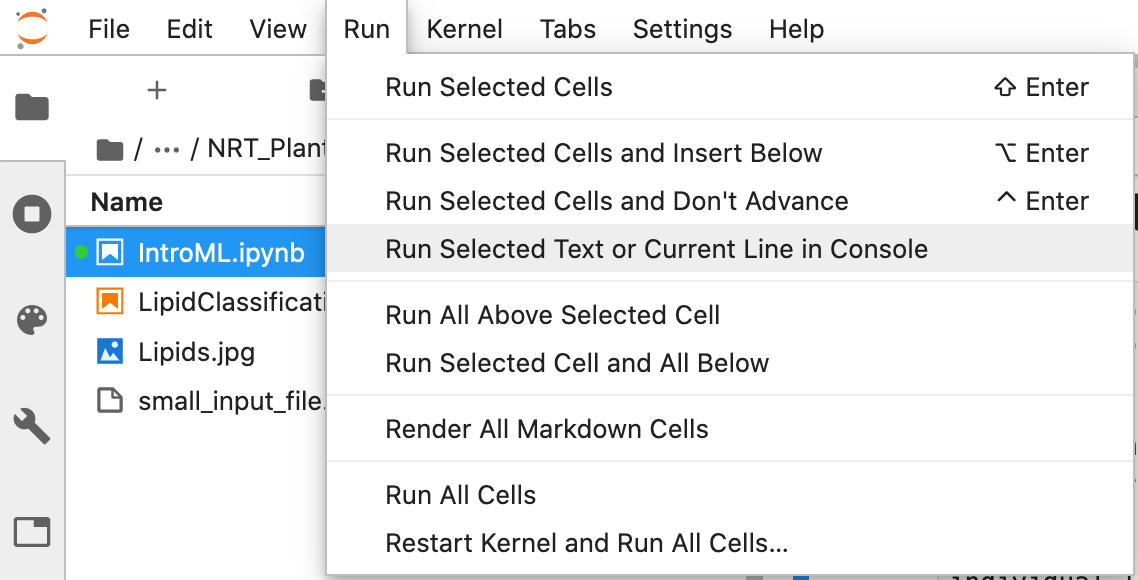

Today, we will be running this exercise on your own computers. For instructions on how to run Jupyter notebook on an HPC environment like XSEDE, check out this link: https://gist.github.com/mcburton/d80e4395cd82737d3677c570aa31ee40

In this tutorial, you will primarily use the following functionalities. Please explore these options before moving onto the next exercise.

__NOTE: To start using this code, you may have to click on "Untrusted" at the top right corner and make this notebook "trusted"__

__1) Code vs Markdown cells:__ A code cell can be run with Python, while a Markdown cell is basically a text box with no code elements. Any individual cell can be converted to "Code" or "Markdown" by clicking on the pull-down menu on top. By default, newly added cells are Code cells, and have to be converted to Markdown if need be. This can be done using the dropdown menu on the top center of the page.

__2) Adding and running a code cell:__ You can add a new cell by pressing __b__ for adding a cell below the current cell, or __a__ for above. The new cell can be changed to code or markdown using the pulldown menu on top. Pressing __dd__ deletes the current block. 

__3) Editing a code/markdown cell:__ Double-clicking on a cell opens it up for editing. A code cell can be run by clicking on a cell, and pressing Ctrl+Enter or Shift+Enter on Windows/Mac. Alternatively, you can click the run button in the top menu bar to run a cell. Pressing Ctrl+Enter in a markdown cell saves the cell and reverts back to the read mode. 

__4) Clearing the output of a cell:__ Existing code cell outputs can be cleared by clicking __Cell >> Current Outputs >> Clear.__ 

### Exercise 1:

* Add a new markdown cell below this block, and write __In-class activity__ in it.
* Convert the text into Heading 2. Use one # for Heading 1, two ## for Heading 2, and so on. All shortcuts and syntax can be found by clicking on the tiny keyboard next to the cell formatting pull down menu on the top
* Add a new code cell below. Type in a print command in Python for printing "Hello World"
* Execute the code cell
* Clear the output

## In class activity

In [ ]:
print("Hello World")

# 2. A RAPID PANDAS TUTORIAL

This tutorial has been adapted ane expanded from 10-minute to Pandas tutorial here: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

Pandas is critical for performing ML in Python, hence, it is important we understand this package properly. Pandas allows you to work with a new data structure called DataFrame (df), which is not available in regular Python. Reading in data as a df enormously simplifies many activities in Python, reducing the code by multiple lines. At the same time, Pandas has a learning curve. For me, that means frequently going onto Google and StackExchange to find answers to questions and finding answers to simple questions can take hours. The payoff is, once you know the answer it becomes easier for the next round!

In [2]:
#First import our everyday modules
import sys, os, random

#Importing star modules of this session
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn

In [22]:
#Let's start with pandas
#You can edit the commands yourself and see how it affects the output by running the code block using Ctrl+Enter

#Create a series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
#list1 = ['a','b'] #This won't work
list1 = pd.Series(['a', 'b']) #Needs to be another pandas series to append to a series
print (s)

s.append(list1)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


C:\Users\Chris Roh\AppData\Local\Temp\ipykernel_5508\4017032930.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s.append(list1)


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
0      a
1      b
dtype: object

np.nan is a special way of creating missing values in numpy and is recommended for use in Pandas. NaN is stored as a float64 type object.

__Try adding a string object to the list above and see how the dtype changes.__

In [23]:




type(s)

pandas.core.series.Series

What are the different types of Pandas data types? See this link: https://pbpython.com/pandas_dtypes.html

However, the object we created above is a pandas series object, which is like a column in an Excel sheet. Within the column, items are the float64 type format. Try the following:

In [24]:
tmpdata1 = ['p','l','s','c','i']
newSeries1 = pd.Series(tmpdata1, index=['A', 'B', 'C', 'D', 'E']) #Index is basically the column with the row names

In [27]:
#Lets add another series to newSeries1
tmpdata2 = ['p','l','b','i','o']
newSeries2 = pd.Series(tmpdata2, index=['A', 'B', 'C', 'D', 'E'])
newSeries3 = pd.concat([newSeries1, newSeries2], axis=0) #Try axis=0 and see what happens
newSeries3
#newSeries3.loc['A'] #loc is used for extracting a specific row, iloc is used for extracting a specific column

A    p
B    l
C    s
D    c
E    i
A    p
B    l
C    b
D    i
E    o
dtype: object

In [28]:
df = pd.DataFrame(tmpdata1, index=['A', 'B', 'C', 'D', 'E'])
df.columns=["N1"]
df

,N1
A,p
B,l
C,s
D,c
E,i


In [29]:
df = pd.DataFrame(list(zip(tmpdata1, ['A', 'B', 'C', 'D', 'E'])))
df.columns=["N1","N2"]
df

,N1,N2
0,p,A
1,l,B
2,s,C
3,c,D
4,i,E


In [35]:
#More examples of concatenation
tmpdata2 = [7,2,0,2]
pd.concat([pd.Series(tmpdata1), pd.Series(tmpdata2)])

#Uncomment the following line after done with above
pd.concat([pd.Series(tmpdata1), pd.Series(tmpdata2)], axis=1) #axis tells how to concat objects -- as rows or columns

,0,1
0,p,7.0
1,l,2.0
2,s,0.0
3,c,2.0
4,i,NaN


In [36]:
#Create a data frame object
dates = pd.date_range('20210101', periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [39]:
#Look at the output carefully. Is it correct?



'''
Then convert it to a Series object as shown above. Output should look like this

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
5   2021-01-06
dtype: datetime64[ns]
'''

pd.Series(dates)

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
5   2021-01-06
dtype: datetime64[ns]

In [42]:
#Now let's make a numpy array (or as colloquially known  -- a matrix or a table)
#We are using NumPy to create a 6 row, 4 column matrix of random values sampled from the normal distribution
#randn simulates sampling of random numbers from a normal distribution
np.random.randn(6,4)

#Re-run the above command. Do you get the same numbers in the matrix? Why or why not?

#No, because they are randomly generated from a normal distibrution, if you set the seed though it would probably be the same numbers 

array([[ 0.6483463 ,  1.14175158,  1.75847957, -0.69895683],
       [ 0.79176058, -0.38056414,  1.37785486,  0.27203678],
       [-0.39859187,  0.89304239, -0.4589223 ,  0.03562185],
       [-1.57042762, -0.48978678, -0.02628704,  2.15811759],
       [ 0.50446607,  0.22974275, -0.88330526, -1.70084725],
       [-1.19220515,  0.38402524, -0.49735227,  1.77786572]])

The specific data type you have created above is called a numpy array.

In [35]:
# Pandas can load a data frame as a data frame. 
# This used to be a hard task in regular Python, since Python only knows strings, numericals, list, dictionaries as objects
dates = pd.date_range('20210101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['Drought', 'UV', 'Cold', 'Heat'])
#df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['Drought', 'UV', 'Cold', 'Heat'])
df

,Drought,UV,Cold,Heat
2021-01-01,0.447790,-0.580794,-1.491341,-0.362726
2021-01-02,-1.609938,-1.339992,-1.787435,1.050020
2021-01-03,-0.512812,-0.196785,-1.035677,-1.789966
2021-01-04,-0.642085,-0.782641,1.467794,0.855009
2021-01-05,1.281448,1.716078,-0.537975,0.779606
2021-01-06,-1.428440,0.089935,0.037377,0.330016


In [44]:
dates = pd.date_range(start='1/1/2018', end='4/1/2018', periods=4)
dates
for date in dates:
    print (date, date.month)

2018-01-01 00:00:00 1
2018-01-31 00:00:00 1
2018-03-02 00:00:00 3
2018-04-01 00:00:00 4


Lets pretend this is a differential gene expression matrix of a plant over 6 different days under 4 stress conditions.

Various panda data types are described here

https://pandas.pydata.org/docs/user_guide/dsintro.html    

In [3]:
#Pandas can also help create a Data Frame object with multiple data types

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20210102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2021-01-02,1.0,3,test,foo
1,1.0,2021-01-02,1.0,3,train,foo
2,1.0,2021-01-02,1.0,3,test,foo
3,1.0,2021-01-02,1.0,3,train,foo


In [4]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Exercise 2:

Add a code cell below and make a pandas dataframe with months from Jan-May as the columns and strings from 1-30 as rows. Fill in the cells with random numbers. Here is the Pandas Dataframe function help page for assistance: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [34]:
df_cal = pd.DataFrame(np.random.randn(30, 5), index = np.arange(1,31), columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_cal

,Jan,Feb,Mar,Apr,May
1,-0.439086,-0.789327,-0.296995,0.543671,-0.762696
2,-0.919566,0.622643,1.150157,-1.528295,-0.458269
3,0.392504,0.157872,-0.938736,0.250618,2.428623
4,0.647504,0.467576,-1.034309,-0.870521,-0.551824
5,-0.364178,-0.548102,0.577741,0.356208,0.500268
6,0.235077,-1.658562,0.249265,-1.352643,-0.080688
7,1.154994,-0.221337,-1.669710,0.954620,0.104104
8,2.740878,-2.100809,0.269157,-0.647049,-1.698917
9,0.421952,-0.019890,0.233061,-1.157047,0.489986
10,-0.417101,1.781021,-0.046802,0.176480,-0.202745


## Manipulating Data in Pandas

In [11]:
#Uncomment individual commands to see what they do
#df.head()
#df.tail(3)
#df.describe()
#df.T
df.sort_index(axis=1, ascending=True)

,Apr,Feb,Jan,Mar,May
1,-0.397320,-0.493031,1.728851,-0.786366,0.438586
2,2.045769,-1.470942,-0.784493,1.691606,1.415677
3,1.674779,-0.355304,0.246530,-0.357856,-0.960028
4,-1.207106,-1.733740,-0.227911,-1.512804,0.546125
5,-0.428902,0.358393,0.717787,-1.071821,0.238868
6,-0.258458,0.751614,-0.440535,0.981451,0.085001
7,0.537796,-0.213590,1.320342,-0.360379,0.005727
8,-1.420323,-0.238595,0.936712,0.007850,0.032815
9,-2.949936,-1.193077,-0.211591,-0.169862,0.426740
10,-2.573617,0.136439,-0.629692,-1.211439,-0.296467


Did you notice that for some commands we use () [e.g. df.head()], while for others we don't [e.g. df.dtypes]? Whats the difference? Try removing the () from df.head() and see what error you get. 

The short answer is head() is a method -- a code block that does some operation on df -- while dtypes is simply a property of df. It is easy to get confused between the two, but if you encounter an error related to this specification, simply look up that command on the internet. For example, dtypes man page tells you its a property while head doesn't have that specification.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [28]:
#Extracting specific rows and columns from the pandas data table
print(df2)
#df2.head()
#df2.loc[:,['A', 'B']].head() 
#df2.loc[1:2, ['A', 'B']] #As in R, first specification before commas is for Rows, after is for columns
#df2.iloc[2,2]
df2.iloc[[0,2],[3,4]]

#What are loc and iloc? Property or method? Loc uses column and row headers, iloc uses indexes, they are proerties

     A          B    C  D      E    F
0  1.0 2021-01-02  1.0  3   test  foo
1  1.0 2021-01-02  1.0  3  train  foo
2  1.0 2021-01-02  1.0  3   test  foo
3  1.0 2021-01-02  1.0  3  train  foo


,D,E
0,3,test
1,3,train
2,3,test


In [29]:
#Adding and removing a column
df2

,A,B,C,D,E,F
0,1.0,2021-01-02,1.0,3,test,foo
1,1.0,2021-01-02,1.0,3,train,foo
2,1.0,2021-01-02,1.0,3,test,foo
3,1.0,2021-01-02,1.0,3,train,foo


In [30]:
#First, lets just extract out a column
colE = df2['E']
colE

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [31]:
#Then uncomment the next two lines
df3 = df2.drop('E', axis=1)
df3

,A,B,C,D,F
0,1.0,2021-01-02,1.0,3,foo
1,1.0,2021-01-02,1.0,3,foo
2,1.0,2021-01-02,1.0,3,foo
3,1.0,2021-01-02,1.0,3,foo


In [32]:
#Insert at the end
df3["E"] = colE
df3

,A,B,C,D,F,E
0,1.0,2021-01-02,1.0,3,foo,test
1,1.0,2021-01-02,1.0,3,foo,train
2,1.0,2021-01-02,1.0,3,foo,test
3,1.0,2021-01-02,1.0,3,foo,train


### Exercise 3:

1. Extract out row with the name 2021-01-03 from df
2. Extract all values of any single column (e.g. UV) greater than 0

Hint: Look at the df.loc function 

In [40]:
df

,Drought,UV,Cold,Heat
2021-01-01,0.447790,-0.580794,-1.491341,-0.362726
2021-01-02,-1.609938,-1.339992,-1.787435,1.050020
2021-01-03,-0.512812,-0.196785,-1.035677,-1.789966
2021-01-04,-0.642085,-0.782641,1.467794,0.855009
2021-01-05,1.281448,1.716078,-0.537975,0.779606
2021-01-06,-1.428440,0.089935,0.037377,0.330016


In [56]:
row03 = df.loc['2021-01-03']
row03

Drought   -0.512812
UV        -0.196785
Cold      -1.035677
Heat      -1.789966
Name: 2021-01-03 00:00:00, dtype: float64

In [64]:
col_UV_pos = df.loc[df['UV'] > 0, 'UV']
col_UV_pos

2021-01-05    1.716078
2021-01-06    0.089935
Freq: D, Name: UV, dtype: float64

This is the end of the Pandas tutorial. It gives you a very brief idea of what this package can do. We will be using this package repeatedly over the next few days of exercises, and so, there will be plenty of opportunities to tinker with it.

# 3. Rapid Matplotlib Tutorial

Matplotlib is a package for plotting. We will get acquainted with another package called seaborn later. Normally I do my plotting in R, but recently, I have been trying to shift to Python to have an integrated workflow. This tutorial is adapted from: https://matplotlib.org/tutorials/introductory/pyplot.html

In this tutorial, we will learn the basics of plotting:
1. A line graph
2. A scatter plot
3. A bar plot
4. A histogram
5. A combination of the above four plots
6. A fun plot that demonstrates the power of matplotlib

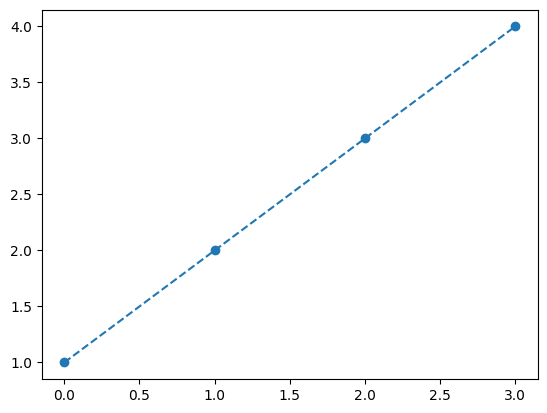

In [65]:
import matplotlib.pyplot as plt

s1=[1,2,3,4] 
s2=[1,4,9,16]

#Lets first just plot one variable
plt.plot(s1, marker="o", linestyle='--')

#Where did plt put the list variables in s1? - s1 is on the y axis with its index on x

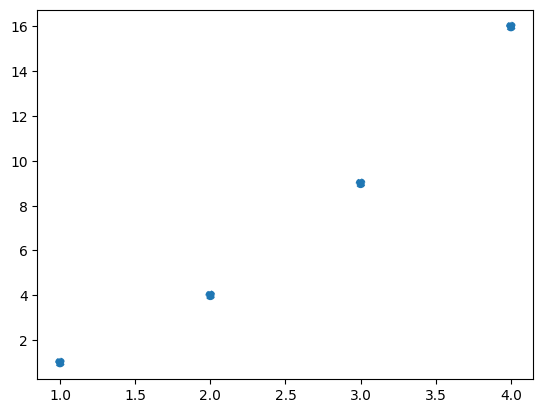

In [66]:
#Now try this:
plt.scatter(s1,s2, marker="o", linestyle='--'); plt.show() #How does plt interpret this now? - s1 on x, s2 on y


Matplotlib first converts all objects (list or otherwise) into a numpy array for plotting.

__POP QUIZ: Explain what the following code is doing?__  

This first makes a range of values from 0 to 5 with spacing of 0.2. Then it plots this on the x axis, with three series of data on the y axis. The first is just the values of t(the original range), then t^2, then t^3

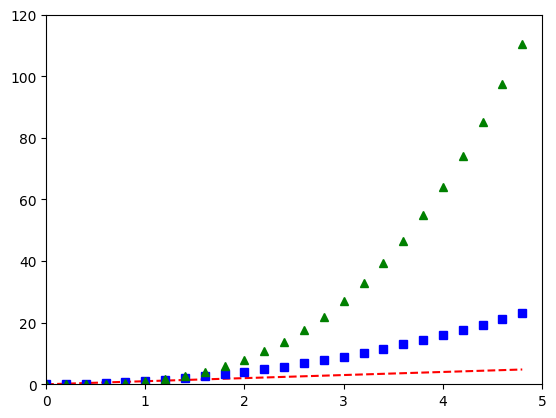

In [67]:
t = np.arange(0.0, 5.0, 0.2) #This makes a numpy array. 
t
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.axis([0,5,0,120]) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html
plt.show()

On the right-hand side top corner of this page, there is a circle next to Python 3. If it is solid, the command is still being processed. If it is open, processing is done.

In [68]:
#Here we will call matplotlib through pandas to make a barplot
baseFreq = pd.DataFrame({'bases':['A', 'T', 'G','C'], 'freq':[0.2, 0.2, 0.3, 0.3]})
baseFreq #Let's first see what we have created


,bases,freq
0,A,0.2
1,T,0.2
2,G,0.3
3,C,0.3


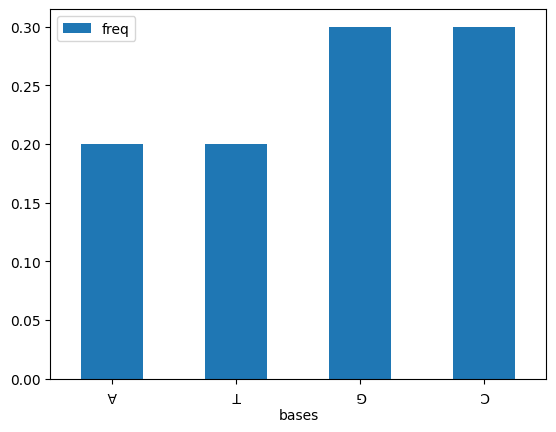

In [75]:
#Now let's plot the graph
baseFreq.plot.bar(x='bases',y='freq',rot=180); plt.show()

#Change the rotation and see what happens

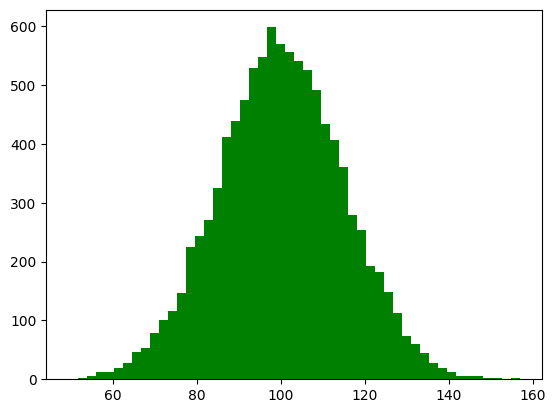

In [76]:
#Plotting a histogram. We will first make a random normal distribution
mu, sigma = 100, 15 #mu is mean, sigma is standard deviation
x = mu + sigma * np.random.randn(10000)  
#the np.random.randn returns small values sampled from a standard normal distibution,
#with a mean of 0, so basically we are adding a little bit of normally distributed variation to the mean

plt.hist(x,50,facecolor='g'); plt.show()

More matplotlib color options are available here: https://matplotlib.org/3.1.1/tutorials/colors/colors.html

### Exercise 4:

* Load the dataframe of Months and Days you made in Exercise 2
* Make a heatmap
* Feel freeto search online for the right function to make a heatmap using pandas and matplotlib

,Jan,Feb,Mar,Apr,May
1,-0.439086,-0.789327,-0.296995,0.543671,-0.762696
2,-0.919566,0.622643,1.150157,-1.528295,-0.458269
3,0.392504,0.157872,-0.938736,0.250618,2.428623
4,0.647504,0.467576,-1.034309,-0.870521,-0.551824
5,-0.364178,-0.548102,0.577741,0.356208,0.500268
6,0.235077,-1.658562,0.249265,-1.352643,-0.080688
7,1.154994,-0.221337,-1.669710,0.954620,0.104104
8,2.740878,-2.100809,0.269157,-0.647049,-1.698917
9,0.421952,-0.019890,0.233061,-1.157047,0.489986
10,-0.417101,1.781021,-0.046802,0.176480,-0.202745


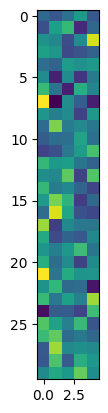

In [87]:
data = df_cal
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar

df_cal.style.background_gradient(cmap='Blues')



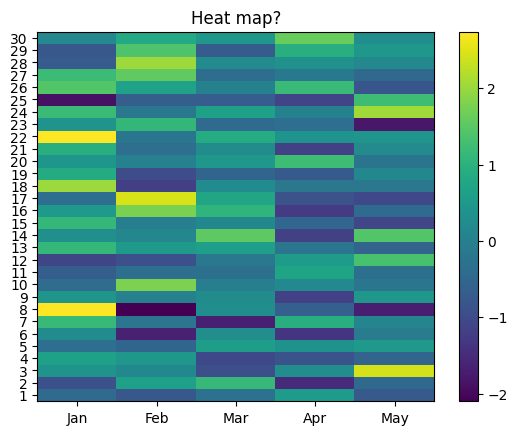

In [93]:
plt.pcolor(df_cal)
plt.yticks(np.arange(0.5, len(df_cal.index), 1), df_cal.index)
plt.xticks(np.arange(0.5, len(df_cal.columns), 1), df_cal.columns)
plt.title("Heat map?")
plt.colorbar()
plt.show()

Now let's make some more complex plots. A couple of other examples adapted from: https://matplotlib.org/3.3.2/gallery/index.html

<class 'numpy.ndarray'>


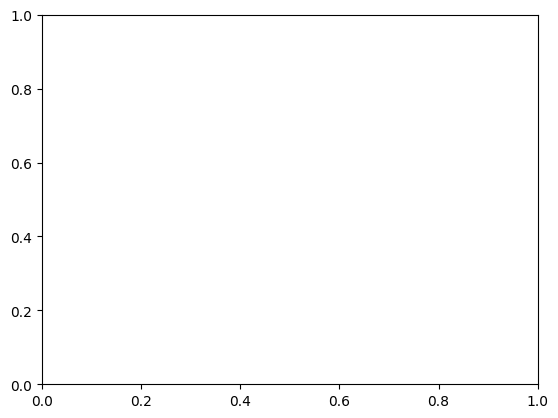

In [79]:
# Data for plotting
e = np.arange(0.0, 2.0, 0.01)
print (type(e))
f = 1 + np.sin(2 * np.pi * e)
f
#The subplots method returns two values fig, ax. Right now, they are empty
#fig, ax = plt.subplots()
#How will you show this plot?

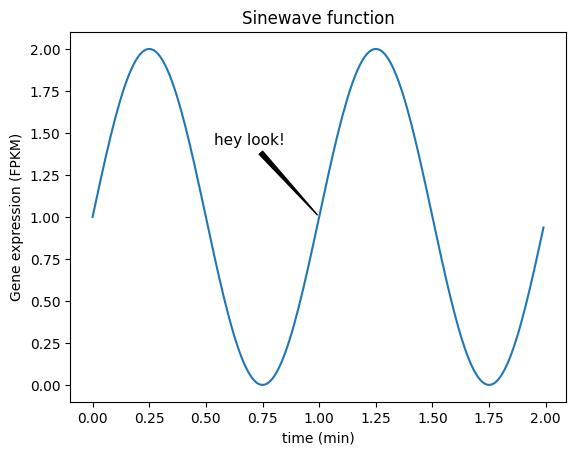

In [81]:
#Let us now add information to the two variables
fig, ax = plt.subplots() 
ax.plot(e, f)
ax.set(xlabel='time (min)', ylabel='Gene expression (FPKM)',
       title='Sinewave function')
#ax.grid()

ax.annotate('hey look!', (1.00, 1.00),
            xytext=(0.85, 1.50), textcoords='data',
            #arrowprops=dict(facecolor='black', shrink=0.05), #comment out this line
            arrowprops=dict(arrowstyle='wedge', facecolor='black'), #uncomment this line
            fontsize=11,
            horizontalalignment='right', verticalalignment='top')
plt.show()

### Exercise 5:

Change parameters in the above plot and understand whats going on. Here are some helpful links:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html

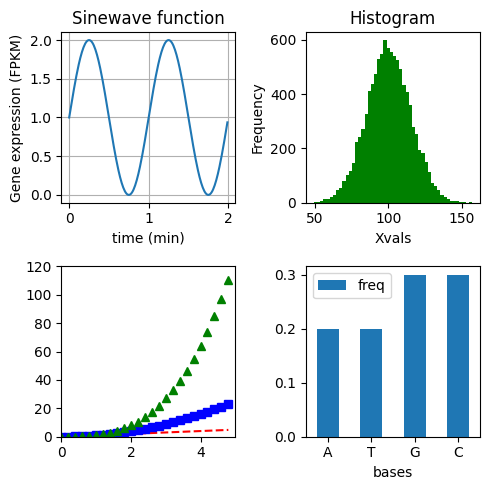

In [83]:
#Make multiple plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) #3 rows, 2 columns

#Make the fig larger
fig.set_figheight(5)
fig.set_figwidth(5)

#Plot 1
ax1.plot(e, f)
ax1.set(xlabel='time (min)', ylabel='Gene expression (FPKM)',
       title='Sinewave function')
ax1.grid()

#Plot 2
ax2.hist(x,50,facecolor='g') 
#Replace XXXX with an appropriate non-green color from the above colors link
ax2.set(xlabel='Xvals', ylabel='Frequency',
       title='Histogram')

#Plot 3
ax3.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
ax3.axis([0,5,0,120])

#Plot 4
baseFreq.plot(ax=ax4, x='bases',y='freq',rot=0, kind='bar')

fig.tight_layout()
plt.show()

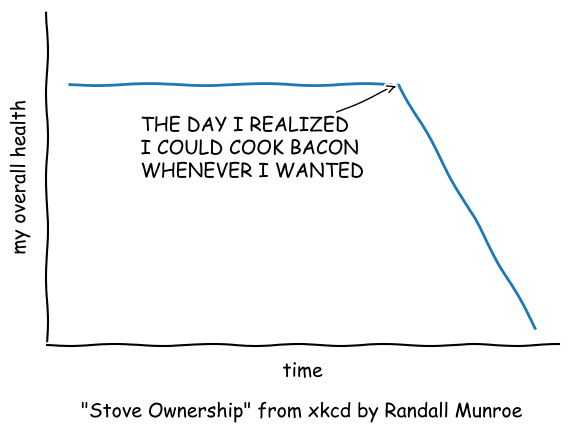

In [82]:
#Just for fun -- XKCD type plots (copied from the same gallery linked above)
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Finally, Seaborn is a package built on matplotlib, and is similar to the R ggplot in its visualization. It is a bit prettier and easier to work with. Another package is plotly, which is for more interactive graphing. We won't go into too much details on Seaborn here, but will use it for plotting in the next lecture.

This is the end of the exercise.

This was a very very very basic introduction of the three frequently used modules for ML and their capabilities. In the next lecture, we will use these libraries with sklearn to run some machine learning tasks

If you are interested in learning Machine Learning but don't have a good dataset to work with, there are plenty of free datasets -- including biology-related datasets -- available on the following two websites for practice.

1) Kaggle (https://www.kaggle.com/datasets)

2) UCI ML repository (https://archive.ics.uci.edu/ml/datasets.html?format=&task=&att=&area=life&numAtt=&numIns=&type=&sort=nameUp&view=table)

__Exercise 2 solution:__

In [ ]:
rownames=range(1,31); print (rownames)
colnames=['Jan','Feb','Mar','Apr','May']; print (colnames)
colnames
df = pd.DataFrame(np.random.randn(30,5), index=rownames, columns=colnames)
#df = pd.DataFrame(np.random.randn(30,5))
#df = pd.DataFrame(np.random.randint(0,100), index=rownames, columns=colnames)
#df = pd.DataFrame(random.randint(0,100), index=rownames, columns=colnames)
df

__Exercise 4 solution:__

In [ ]:
plt.figure(figsize=(7,7))
plt.pcolor(df, edgecolors='k', linewidths=1)
plt.xticks(np.arange(5),colnames)

__Exercise 3 solution:__

In [ ]:
df.loc['20210103']
df.loc[df['UV']>0]